# Homework 2
Applied Neural Networks <br/>
Dr. Leslie Kerby <br/>
Katherine Wilsdon


**Question 1** <br/>
Import the MNIST Digits Dataset as shown in class. Put all 70k images in one container (no splitting the dataset).

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

# Set X and y
X, y = mnist['data'], mnist['target'].astype(int)
print(f'Shape of X: {X.shape} Shape of y: {y.shape}')

Shape of X: (70000, 784) Shape of y: (70000,)


In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
type(X[0,0])

numpy.float64

In [6]:
type(y[0])

numpy.int64

**Question 2: Unsupervised Learning** <br/>
Use k-means on the dataset (with k=10). Report the accuracy. 

*Hint: The method [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) may be useful for comparing the predicted k-means labels with the actual labels.*

**Note!** The cluster labels from kmeans will be arbitrary and therefore will not likely correspond to the digit numbers 0-9. This artifically makes the model seem poor. **Fix this by re-labeling the kmeans clusters to a representative digit number.** 

In [53]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

# Set X and y
X, y = mnist['data'], mnist['target'].astype(int)
print(f'Shape of X: {X.shape} Shape of y: {y.shape}')

Shape of X: (70000, 784) Shape of y: (70000,)


In [54]:
# Use kmeans to fit the 70,000 images
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42, n_jobs=-1)
y_pred_kmeans = kmeans.fit_predict(X)

CPU times: user 713 ms, sys: 338 ms, total: 1.05 s
Wall time: 2min 26s


In [55]:
# Get accuracy without label changes
from sklearn.metrics import accuracy_score
print("The accuracy is " + str(accuracy_score(y, y_pred_kmeans, normalize=True) * 100) + "%.")

The accuracy is 10.317142857142857%.


In [56]:
from scipy import stats

# Find the mode of each cluster
kmeans_cluster_pts = []
for x in range(10):
  indices = np.where(kmeans.labels_ == x)                   # find the indices of each cluster
  kmeans_cluster_mode = int(stats.mode(y[indices]).mode)    # find the mode of y for each cluster
  kmeans_cluster_pts.append(kmeans_cluster_mode)            # append mode to the list
kmeans_cluster_pts

[3, 1, 8, 7, 4, 0, 1, 2, 9, 6]

In [57]:
# Change labels to the mode of each cluster
for x in range(len(kmeans.labels_)):
  for i in range(len(kmeans_cluster_pts)):
    if kmeans.labels_[x] == i:
      kmeans.labels_[x] = kmeans_cluster_pts[i]
      break
kmeans.labels_

array([8, 0, 4, ..., 7, 8, 6], dtype=int32)

In [58]:
 # Check accuracy
 accuracy_kmeans = accuracy_score(y, y_pred_kmeans, normalize=True) * 100
 print("The accuracy is " + str(accuracy_kmeans) + "%.")

The accuracy is 58.02428571428572%.


**Question 3: More Unsupervised Learning**<br/>
Use t-SNE on the dataset to reduce the number of features to 2. Use k-means on this feature-reduced dataset. Again report the accuracy. Graph the clusters with the t-SNE 2D feature space, according to k-means labels and the correct dataset labels.

**Undergrad students use a random subset of 10k images for this problem. <br/>
Graduate students use t-SNE on the full 70k image dataset (takes about two hours on Colab).**

*Hint: Grad students may wish to run this on a local install of Jupyter Notebook. If so, I recommend [Anaconda](https://www.anaconda.com/distribution/#download-section). Also, the `n_jobs` parameter of `sklearn.manifold.TSNE` is only available in the latest version of sklearn -- 0.22 -- so you may need to update your scikit-learn package within Anaconda (this [site](https://anaconda.org/anaconda/scikit-learn) and [this site](https://stackoverflow.com/questions/33679938/how-to-upgrade-scikit-learn-package-in-anaconda/33680217) may be useful).*

**Again** the kmeans cluster labels will likely not correspond to digit numbers; **fix this**.

In [12]:
# Import tsnecuda
!wget https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
!tar xvjf tsnecuda-2.1.0-cuda100.tar.bz2
!cp -r site-packages/* /usr/local/lib/python3.6/dist-packages/
!ln -s /content/lib/libfaiss.so $LD_LIBRARY_PATH/libfaiss.so

from tsnecuda import TSNE

--2020-02-12 17:25:24--  https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.93.24, 104.17.92.24, 2606:4700::6811:5c18, ...
Connecting to anaconda.org (anaconda.org)|104.17.93.24|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5d019c23c7424a015486440c/5d790a95778a870c42137059?response-content-disposition=attachment%3B%20filename%3D%22tsnecuda-2.1.0-cuda100.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27tsnecuda-2.1.0-cuda100.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=60&X-Amz-Date=20200212T172524Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEI7%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJHMEUCIG8AS5yTFyXdN80z%2FnvCmoLatxCjg%2FEcSgf9f38jd%2BLsAiEA%2FnahX%2F4iggDr4koxN5T2pMLLp5BF29I4vBj2TRAlu18qtAMIRxAAGgw0NTU4NjQwOTgzNzgiDDLXxAUkku7vAAJx0iqRAysXPmJtd

In [46]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

# Set X and y
X, y = mnist['data'], mnist['target'].astype(int)
print(f'Shape of X: {X.shape} Shape of y: {y.shape}')

Shape of X: (70000, 784) Shape of y: (70000,)


In [47]:
%%time
# Transform the 70,000 images into the tsne feature space
X_tsne = TSNE(n_components=2).fit_transform(X)

CPU times: user 10 s, sys: 5.74 s, total: 15.8 s
Wall time: 15.4 s


In [48]:
%%time
# Use the tsne feature space to fit with kmeans
kmeans = KMeans(n_clusters=10, random_state=42, n_jobs=-1)
y_pred_kmeans_tsne = kmeans.fit_predict(X_tsne)
y_pred_kmeans_tsne

CPU times: user 60.6 ms, sys: 8.21 ms, total: 68.8 ms
Wall time: 1.95 s


In [49]:
# Find the mode of each cluster
tsne_kmeans_cluster_pts = []
for x in range(10):
  indices = np.where(kmeans.labels_ == x)                         # find the indices of each cluster
  tsne_kmeans_cluster_mode = int(stats.mode(y[indices]).mode)     # find the mode of y for each cluster 
  tsne_kmeans_cluster_pts.append(tsne_kmeans_cluster_mode)        # append mode to the list    
tsne_kmeans_cluster_pts

[2, 3, 4, 6, 7, 1, 0, 1, 8, 5]

In [50]:
# Change labels to the mode of each cluster
for x in range(len(kmeans.labels_)):
  for i in range(len(tsne_kmeans_cluster_pts)):
    if kmeans.labels_[x] == i:
      kmeans.labels_[x] = tsne_kmeans_cluster_pts[i]
      break
kmeans.labels_

array([5, 0, 4, ..., 8, 5, 6], dtype=int32)

In [51]:
 # Check accuracy
 accuracy_kmeans_tsne = accuracy_score(y, y_pred_kmeans_tsne, normalize=True) * 100
 print("The accuracy is " + str(accuracy_kmeans_tsne) + "%.")

The accuracy is 84.24142857142857%.


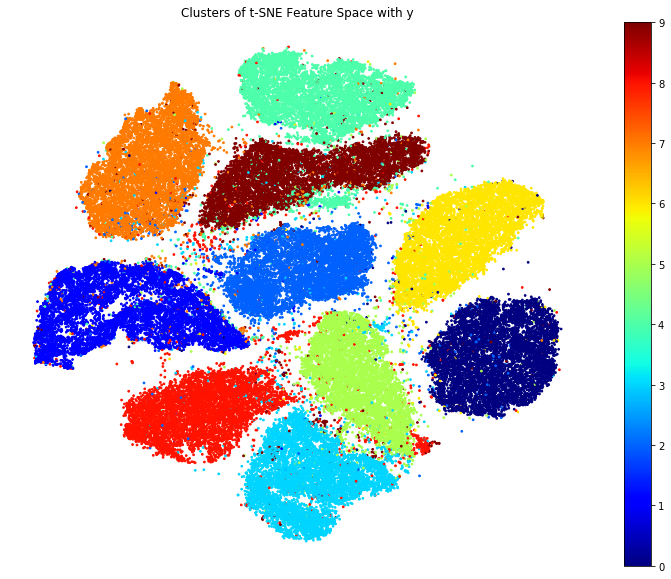

In [38]:
# Graph the clusters with the t-SNE 2D feature space according to the correct dataset labels, y.
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=y, s=3, cmap='jet')
plt.axis('off')
plt.title("Clusters of t-SNE Feature Space with y")
plt.colorbar()
plt.show()

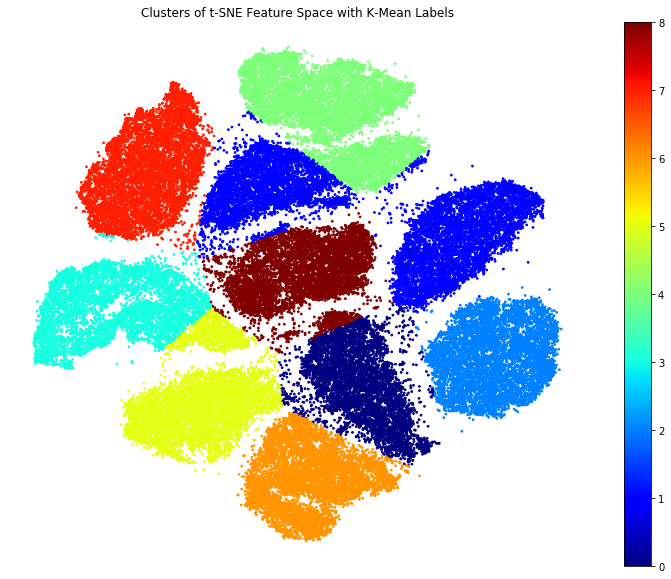

In [39]:
# Graph the clusters with the t-SNE 2D feature space according to k-means labels .
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=kmeans.labels_, s=3, cmap='jet')
plt.axis('off')
plt.title("Clusters of t-SNE Feature Space with K-Mean Labels")
plt.colorbar()
plt.show()

**Question 4: Semi-Supervised Learning**<br/>
While labelling all 70k images would be very time-consuming, labelling a small subset is not. A supervised model can be trained on that small subset. This is called "semi-supervised learning".<br/>
Take 50 random images from the 70k image dataset and use their labels to train a Logistic Regression model. Test it on the full dataset and report the accuracy.  

In [21]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

# Set X and y
X, y = mnist['data'], mnist['target'].astype(int)
print(f'Shape of X: {X.shape} Shape of y: {y.shape}')

Shape of X: (70000, 784) Shape of y: (70000,)


In [22]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Use 50 images as the training set and fit model with Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=69950)
logreg = LogisticRegression(solver='lbfgs',random_state=42, n_jobs=-1, max_iter=1000) 
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X)

CPU times: user 1.02 s, sys: 38.9 ms, total: 1.06 s
Wall time: 931 ms


In [23]:
# Check accuracy
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y, y_pred_logreg, normalize=True) * 100
print("The accuracy is " + str(accuracy_logreg) + "%.")
print(f'Training score: {logreg.score(X_train, y_train)}      Testing score: {logreg.score(X_test, y_test)}')

The accuracy is 63.7%.
Training score: 1.0      Testing score: 0.6367405289492495


**Question 5: More Semi-Supervised Learning**<br/>
A more sophisticated semi-supervised method is to use k-means to find "important" or "representative" instances, and then label those.<br/>
Use k-means with k=50. Find the nearest instance to each of the 50 centroids, and these will be your 50 "representative" instances. Use their labels (or manually label them if you wish) to train a Logistic Regression model. Report the accuracy.

*Hint: You can use KMeans.transform() or KMeans.fit_transform() to transform X to cluster-distance space.*<br/>
*Hint 2: Then you can use np.argmin() to find the indices of the minimum cluster-distance of each cluster. Use that as a Boolean mask on X to select out your 50 'representative' instances.*

In [62]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

# Set X and y
X, y = mnist['data'], mnist['target'].astype(int)
print(f'Shape of X: {X.shape} Shape of y: {y.shape}')

Shape of X: (70000, 784) Shape of y: (70000,)


In [63]:
%%time
from sklearn.cluster import KMeans

# Use kmeans to fit the 70,000 images
kmeans = KMeans(n_clusters=50, random_state=42, n_jobs=-1)
kmeans.fit(X)
y_pred = kmeans.predict(X)

CPU times: user 1.72 s, sys: 487 ms, total: 2.2 s
Wall time: 9min 43s


In [64]:
from scipy import stats

# Finds the mode of each cluster
kmeans_cluster_pts = []
for x in range(50):
  indices = np.where(kmeans.labels_ == x)                   # find the indices of each cluster
  kmeans_cluster_mode = int(stats.mode(y[indices]).mode)    # find the mode of y for each cluster
  kmeans_cluster_pts.append(kmeans_cluster_mode)            # append to the list
kmeans_cluster_pts

[7,
 2,
 6,
 1,
 0,
 1,
 6,
 9,
 6,
 4,
 9,
 3,
 1,
 2,
 3,
 6,
 4,
 0,
 8,
 8,
 9,
 8,
 6,
 9,
 7,
 0,
 9,
 0,
 7,
 5,
 5,
 5,
 4,
 5,
 0,
 3,
 2,
 8,
 3,
 1,
 4,
 7,
 6,
 0,
 2,
 5,
 7,
 5,
 3,
 2]

In [65]:
# Change labels to the mode of each cluster
for x in range(len(kmeans.labels_)):
  for i in range(len(kmeans_cluster_pts)):
    if kmeans.labels_[x] == i:
      kmeans.labels_[x] = kmeans_cluster_pts[i]
      break
kmeans.labels_

array([5, 0, 4, ..., 4, 5, 6], dtype=int32)

In [66]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Use 50 images as the training set using the changed labels and fit model with Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, kmeans.labels_, test_size=69950)

kmeans_logreg = LogisticRegression(solver='lbfgs',random_state=42, n_jobs=-1, max_iter=1000) 
kmeans_logreg.fit(X_train, y_train)
y_pred_kmeans_logreg = kmeans_logreg.predict(X)

CPU times: user 1.01 s, sys: 19.7 ms, total: 1.03 s
Wall time: 916 ms


In [67]:
# Check accuracy
from sklearn.metrics import accuracy_score
accuracy_kmeans_logreg = accuracy_score(y, y_pred_kmeans_logreg, normalize=True)* 100
print("The accuracy is " + str( accuracy_kmeans_logreg) + "%.")
print(f'Training score: {kmeans_logreg.score(X_train, y_train)}      Testing score: {kmeans_logreg.score(X, y)}')

The accuracy is 61.30285714285715%.
Training score: 1.0      Testing score: 0.6130285714285715


This could be improved further by assigning the 50 centroid labels to 10 instances nearby, instead of just to the nearest point.

**Question 6**<br/>
Comment on the accuracy of these different unsupervised and semi-supervised methods. Which one was the best? Worst? Best considering time or effort? How did they compare to the supervised Logistic Regression? Etc...

In [96]:
print("Unsupervised Models:\n")
print("The accuracy of using kmeans with 10 clusters is " + str(accuracy_kmeans) + "% and takes\nabout 2 minutes 26 seconds.\n")
print("The accuracy of using the t-SNE 2D feature space according to k-means labels\nis " + str(accuracy_kmeans_tsne) + "% and takes about 17.35 seconds using tsnecuda.\n")

print("\nSemi-supervised Models:\n")
print("The accuracy of using the 50 random images to train the Logistic Regression model\nis " + str(accuracy_logreg) + "% and takes about 931 milliseconds.\n")
print("The accuracy of using the labels of kmeans with 50 clusters to train the Logistic\nRegression model is " + str(accuracy_kmeans_logreg) + "% and takes about 9 minutes 40 seconds.\n")

print("The unsupervised t-SNE 2D feature space according to k-means labels is the best\nbecause the accuracy is over 80% and the time to run the t-SNE and kmeans models\nwas less than 30 seconds. The time to run the models was aided by tsnecuda.\nHowever, if trying to run tsne on such a large dataset locally, tsnecuda only\nruns on linux. So, if tsnecuda was not available for your operating system, the\ntime to run the model would be hours causing it to drop to the worst model.\n")

print("The worst model would typically be the kmeans with 10 clusters because the accuracy\nis 58%. However, because the semi-supervised models use 50 random images to train the\nLogistic Regression model, some models may have in a poor sampling for the training\nset. Specifically, one instance of the model using the labels of kmeans with 50 clusters\nto train the Logistic Regression resulted in a 54% accuracy. Another negative aspect\nabout the model using the labels of kmeans with 50 clusters to train the Logistic Regression\nwas that it takes almost 10 minutes to run, making it the longest model. Because of the\nvariability and the time, the model using the labels of kmeans with 50 clusters to train the\nLogistic Regression could be argued to be the worst model.\n")

print("The model that was the best considering time and effort was the semi-supervised model that uses\nthe 50 random images to train the Logistic Regression model. The model only required one code\ncell and was the fastest by taking less than a second to run. There is no worst model regarding\neffort because the rest of the models had 4 code cells. As stated previously, the worst model\nregarding time was the model using the labels of kmeans with 50 clusters to train the Logistic\nRegression because it took about 10 minutes to run.\n")


Unsupervised Models:

The accuracy of using kmeans with 10 clusters is 58.02428571428572% and takes
about 2 minutes 26 seconds.

The accuracy of using the t-SNE 2D feature space according to k-means labels
is 84.24142857142857% and takes about 17.35 seconds using tsnecuda.


Semi-supervised Models:

The accuracy of using the 50 random images to train the Logistic Regression model
is 63.7% and takes about 931 milliseconds.

The accuracy of using the labels of kmeans with 50 clusters to train the Logistic
Regression model is 61.30285714285715% and takes about 9 minutes 40 seconds.

The unsupervised t-SNE 2D feature space according to k-means labels is the best
because the accuracy is over 80% and the time to run the t-SNE and kmeans models
was less than 30 seconds. The time to run the models was aided by tsnecuda.
However, if trying to run tsne on such a large dataset locally, tsnecuda only
runs on linux. So, if tsnecuda was not available for your operating system, the
time to run the mo